This is the problem copied from [here](http://mathb.in/152113)  and asked [here](https://www.peeranswer.com/question/5996699e848d3c0360b31ba5).

> $Definitions$

> Define indicator function when $\varphi(k)$ divides $n$:
> $$\textbf{1}_{\varphi(k)}(n) = \left\{\begin{matrix} 1 & \varphi(k) \mid n \\ 0 & \varphi(k) \nmid n  \end{matrix} \right.$$
>
>
> Number of times $n$ is divisible by the totient function:
>$$h(n) = \sum_{k=1}^\infty \textbf{1}_{\varphi(k)}(n) $$
>
>
>Number of divisors of n:
>$$\tau(n) = \sum_{d|n} 1$$
>
>---
>
>$Question$
>
>What's the max value of $\frac{h(n)}{n}$ and/or $\frac{h(n)}{\tau(n)}$ or does no max exist?
>
>---
>
>Main thing I'm interested in is Euler's theorem, when $\gcd(a,b)=1$:
>
>$$a^{\varphi(b)} \equiv 1 \mod b$$
>
>Solving this question for some n that maximizes either of those values above would give a kind of "optimal" solution for:
>
>$$a^n \equiv 1 \mod n$$



In [1]:
import matplotlib.pyplot as plt
import numpy as np

This is the most naive way of defining the given functions.

In [2]:
def gcd(a,b):
    while b!=0:
        t = b
        b = a%b
        a = t
    return a
  
def phi(n):
    counter = 0
    for i in range(1,n,1):
        if gcd(i,n)==1:
            counter +=1
    return counter
# vecotrized version
phi_vec = np.vectorize(phi)

def indicator(n,k):
    if phi(k)==0:return 0
    if n%phi(k):
        return 0
    return 1

# this is not real h(n) 
def h(n):
    counter = 0
    # here heuristically I've bounded k up to 3n which may possibly be wrong
    for k in range(1,3*n,1):
        counter += indicator(n,k)
    return counter

def tau(n):
    counter = 0
    for i in range(1,n,1):
        if n%i==0:
            counter += 1
    return counter

Let's see how $\phi(n)$ behaves.

In [ ]:
N = np.arange(1,10000,1)
np.save('N_1.npy',N)
PHI = phi_vec(N)
np.save('PHI_1.npy',PHI)

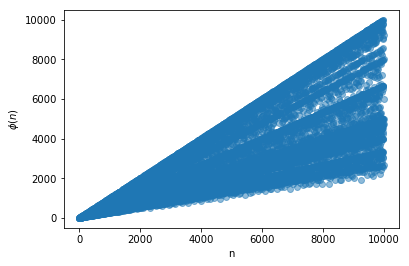

In [3]:
N = np.load('N_1.npy')
PHI = np.load('PHI_1.npy')
plt.scatter(N,PHI,alpha=0.5)
plt.xlabel('n')
plt.ylabel('$\phi(n)$')
plt.show()

I want to know how $h(n)$ behaves. In the actual definition, the iterations go up to infinity. But it is not necessary. If we want to find $h(n)$ what we are interested in is $\{k~|~\phi(k)\le n \forall n\in \mathbb{Z}^+\}$. As mentioned in [here](https://en.wikipedia.org/wiki/Euler's_totient_function#Some_values_of_the_function) the **lower limit of the graph** is proportional to $\frac{n}{\log\log n}$.

Let's check whether it makes sense.

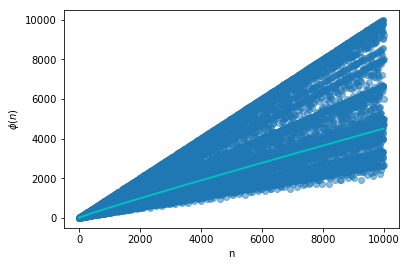

In [4]:
N = np.load('N_1.npy')[1:]
PHI = np.load('PHI_1.npy')[1:]
plt.scatter(N,PHI,alpha=0.5)
plt.plot(N,N/(np.log(np.log(N))),'c',linewidth=2)
plt.xlabel('n')
plt.ylabel('$\phi(n)$')
plt.show()

Hm.. This is not what we want to happen... Let's do some slight changes to $\frac{n}{\log\log n}$ until we get what we **really** want at least fitting for 1st 10000.

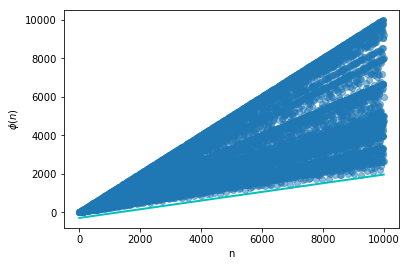

In [5]:
N = np.load('N_1.npy')
PHI = np.load('PHI_1.npy')
boundary = lambda N:-290+N/(np.log(np.log(N+2)+2)+2)
boundary2 = lambda N:-290+.225*N
plt.scatter(N,PHI,alpha=0.5)
plt.plot(N,boundary2(N),'c',linewidth=2)
plt.xlabel('n')
plt.ylabel('$\phi(n)$')
plt.show()

In [20]:
-290+9999/(np.log(np.log(10001)+2)+2)

1973.8328543213884

`That's nice. So the replacement for $\infty$ in $h(n)$ is now there, at least for 

$n <$ 1973.8328543213884.
Now it's time to derefine $h(n)$ the right way. We are confident that this $h(n)$ is valid for $n<1973$.

In [22]:
-290+.225*9998

1959.5500000000002

> For simplicity instead of taking $-290+\frac{n}{\log(\log (n+2)+2)+2}$ as the function I took `boundary2` which is just $-290+.225 n$ which is okay for $n<$1959

In [7]:
def h(n):
    counter = 0
    k=1
    L = (n+290)/.225
    while k<L:
        counter += indicator(n,k)
        k += 1
    return counter

In [8]:
h_vec = np.vectorize(h)

In [ ]:
N=np.load('N_1.npy')[:600]
HN = []
for n in N:
    HN.append(h(n)/n)
    print(n)

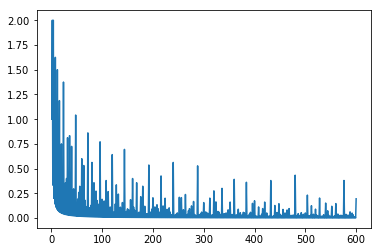

In [19]:
plt.plot(N[:600],HN)
plt.show()

In [23]:
np.save('HN_1.npy',HN)